In [1]:
import pandas as pd
import numpy as np

In [2]:
#Creating SQL connection

In [3]:
import django
from django.conf import settings

import os
import sqlite3

# Set the DJANGO_SETTINGS_MODULE environment variable
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'ils.settings')

# Initialize Django
django.setup()

db_path = os.path.join(settings.BASE_DIR, 'db.sqlite3')
conn = sqlite3.connect(db_path)

In [4]:
#User response table

In [5]:
# this cell

table_name = 'quiz_userresponse'
query = f"SELECT * FROM {table_name}"
df_userresponse = pd.read_sql_query(query, conn)
# df_userresponse = pd.read_csv('smata.csv')
df_userresponse

,id,time_spent,times_option_changed,is_correct,question_id,user_confidence
0,3,11000000,0,1,1,1
1,4,24000000,0,1,2,2
2,5,37000000,0,1,3,6
3,6,22000000,0,1,4,3
4,7,36000000,0,1,5,7
5,8,26000000,0,1,6,4
6,9,59000000,0,0,7,5
7,10,20000000,0,0,8,7
8,11,42000000,0,1,9,3
9,12,12000000,0,1,10,3


In [6]:
from math import floor

df_userresponse = df_userresponse.groupby('question_id').agg({
    'id':'last',
    'times_option_changed': 'sum',
    'is_correct': 'last',
    'user_confidence': lambda x: floor(x.mean()),
    'time_spent': 'sum'
}).reset_index()

df_userresponse = df_userresponse[['id', 'times_option_changed', 'is_correct', 'question_id', 'user_confidence', 'time_spent']]

df_userresponse

,id,times_option_changed,is_correct,question_id,user_confidence,time_spent
0,3,0,1,1,1,11000000
1,4,0,1,2,2,24000000
2,5,0,1,3,6,37000000
3,6,0,1,4,3,22000000
4,7,0,1,5,7,36000000
5,8,0,1,6,4,26000000
6,9,0,0,7,5,59000000
7,10,0,0,8,7,20000000
8,11,0,1,9,3,42000000
9,12,0,1,10,3,12000000


In [7]:
#Questions table

In [8]:
table_name = 'quiz_question'
query = f"SELECT * FROM {table_name}"
df_question = pd.read_sql_query(query, conn)
df_question

,id,label,cognitive_ability,is_answered
0,1,What is the product of 12 and 9?,Level_1,0
1,2,"If y = 3, what is the value of 4y - 5?",Level_1,0
2,3,What is the perimeter of a square with a side ...,Level_1,0
3,4,"What is the next number in the series: 2, 5, 8...",Level_1,0
4,5,What is 20% of 150?,Level_1,0
5,6,Solve for x in the equation 3x - 7 = 11.,Level_2,0
6,7,"What is the next number in the sequence: 5, 10...",Level_2,0
7,8,"A box contains 4 red, 5 blue, and 6 green ball...",Level_2,0
8,9,What is the simple interest on $2000 at an ann...,Level_2,0
9,10,"If 'CAT' is coded as 'DBU', how is 'DOG' coded...",Level_2,0


In [9]:
question_cognitive_ability = dict(zip(df_question['id'], df_question['cognitive_ability']))
question_cognitive_ability

{1: 'Level_1',
 2: 'Level_1',
 3: 'Level_1',
 4: 'Level_1',
 5: 'Level_1',
 6: 'Level_2',
 7: 'Level_2',
 8: 'Level_2',
 9: 'Level_2',
 10: 'Level_2',
 11: 'Level_3',
 12: 'Level_3',
 13: 'Level_3',
 14: 'Level_3',
 15: 'Level_3'}

In [10]:
df_userresponse['cognitive_ability'] = df_userresponse['question_id'].map(question_cognitive_ability)
df_userresponse

,id,times_option_changed,is_correct,question_id,user_confidence,time_spent,cognitive_ability
0,3,0,1,1,1,11000000,Level_1
1,4,0,1,2,2,24000000,Level_1
2,5,0,1,3,6,37000000,Level_1
3,6,0,1,4,3,22000000,Level_1
4,7,0,1,5,7,36000000,Level_1
5,8,0,1,6,4,26000000,Level_2
6,9,0,0,7,5,59000000,Level_2
7,10,0,0,8,7,20000000,Level_2
8,11,0,1,9,3,42000000,Level_2
9,12,0,1,10,3,12000000,Level_2


In [11]:
df_userresponse['time_spent'] = df_userresponse['time_spent'].apply(lambda x: x / 1000000)
cognitive_ability_mapping = {'Level_1': 1, 'Level_2': 2, 'Level_3': 3}
df_userresponse['cognitive_ability'] = df_userresponse['cognitive_ability'].map(cognitive_ability_mapping)
df_userresponse

,id,times_option_changed,is_correct,question_id,user_confidence,time_spent,cognitive_ability
0,3,0,1,1,1,11.0,1
1,4,0,1,2,2,24.0,1
2,5,0,1,3,6,37.0,1
3,6,0,1,4,3,22.0,1
4,7,0,1,5,7,36.0,1
5,8,0,1,6,4,26.0,2
6,9,0,0,7,5,59.0,2
7,10,0,0,8,7,20.0,2
8,11,0,1,9,3,42.0,2
9,12,0,1,10,3,12.0,2


In [12]:
# Visualizations for EDA

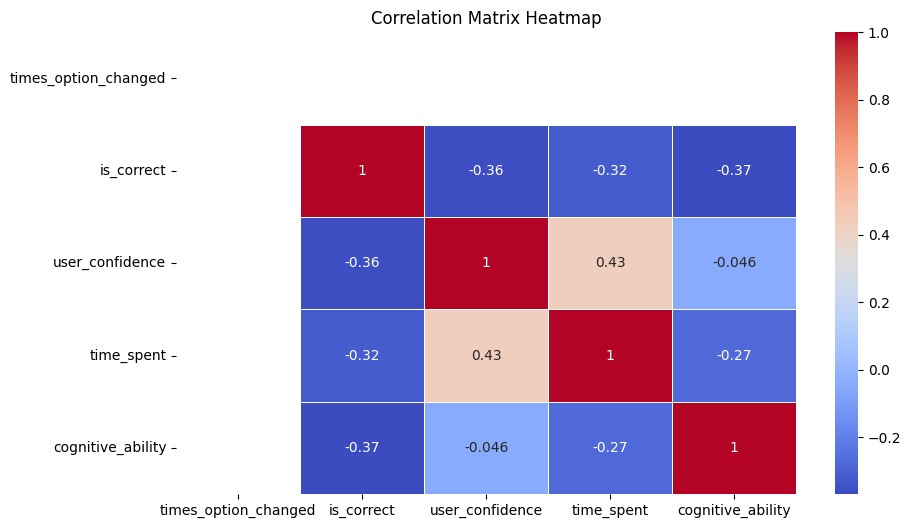

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix
corr_data = df_userresponse[[ 'times_option_changed', 'is_correct', 'user_confidence', 'time_spent', 'cognitive_ability']]
corr_matrix = corr_data.corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

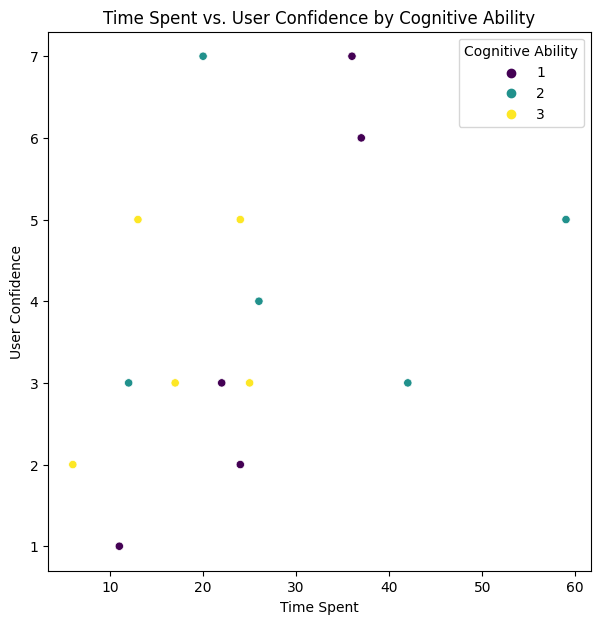

In [14]:
# Scatter Plot
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_userresponse, x='time_spent', y='user_confidence', hue='cognitive_ability', palette='viridis')
plt.title('Time Spent vs. User Confidence by Cognitive Ability')
plt.xlabel('Time Spent')
plt.ylabel('User Confidence')
plt.legend(title='Cognitive Ability')
plt.show()

In [15]:
#Model

In [16]:
features = ['time_spent', 'times_option_changed', 'is_correct', 'cognitive_ability']
target = 'user_confidence'

In [17]:
from sklearn.model_selection import train_test_split

X = df_userresponse[features]
y = df_userresponse[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
predictions = model.predict(X_test)
print(y_test)
print(predictions)

9     3
11    3
0     1
Name: user_confidence, dtype: int64
[4.34 4.97 3.98]


In [20]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2.0966666666666662


In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error: {rmse:.2f}')

Root Mean Squared Error: 2.20


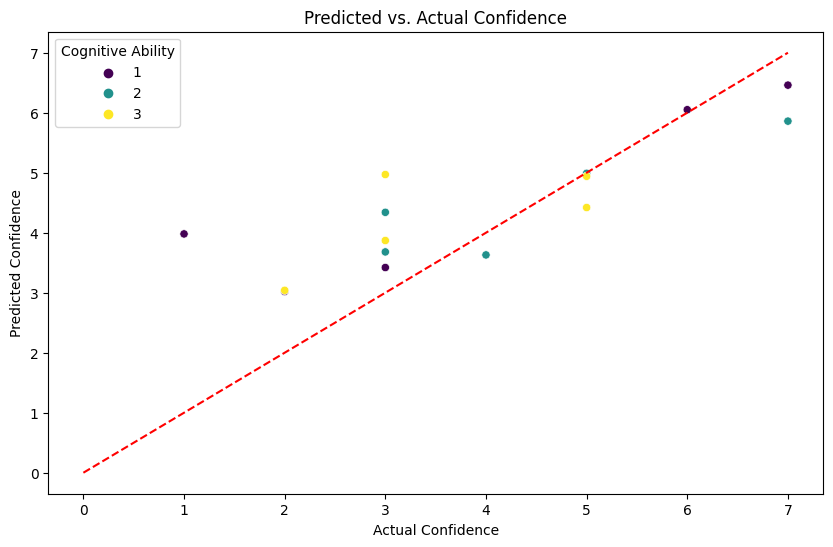

In [22]:
X = df_userresponse[['time_spent', 'times_option_changed', 'is_correct', 'cognitive_ability']]
predicted_confidence = model.predict(X)

# Plotting Predicted vs Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_userresponse, x='user_confidence', y=predicted_confidence, hue='cognitive_ability', palette='viridis')
plt.plot([0, 7], [0, 7], color='red', linestyle='--')
plt.title('Predicted vs. Actual Confidence')
plt.xlabel('Actual Confidence')
plt.ylabel('Predicted Confidence')
plt.legend(title='Cognitive Ability')
plt.show()

In [23]:
conn.close()

In [24]:
A = floor(df_userresponse['user_confidence'].mean())
A

3